Проект «Литература и мемы: чувство юмора у читателей независимого литературного журнала Незнание»

In [27]:
import vk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import datetime
import dateutil

token = "0bc0ac250bc0ac250bc0ac25d20bb494a900bc00bc0ac2554b73061293e649646a60388"  
session = vk.Session(access_token=token)  
vk_api = vk.API(session)  

personal_token = "ebe514d0adefb55ca98e51ba4c511b6b35564cebb23348a9ca0cb7b9364408116ebd285e037b70c1fead6"  
session = vk.Session(access_token=personal_token)  
vk_personal_api = vk.API(session)

In [31]:
#Найти членов группы
def get_members(groupid, fields=('sex', 'bdate', 'city', 'country', 'domain')):
    first = vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92)
    data = first["items"] 
    count = first["count"] // 1000 
    for i in range(1, count+1):  
        data = data + vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92, offset=i*1000)["items"]
    return data

In [32]:
members_neznanie = get_members('neznaniejournal')

In [33]:
members_mempoetry = get_members('mempoetry')

In [34]:
%matplotlib notebook
%matplotlib notebook

plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 150
matplotlib.rcParams['font.size'] = 4.0

In [35]:
#Участники группы "Незнание"
members_neznanie = pd.DataFrame(data = members_neznanie)
members_neznanie.head()

,bdate,can_access_closed,city,country,domain,first_name,id,is_closed,last_name,sex
0,9.5,True,"{'id': 2, 'title': 'Saint Petersburg'}","{'id': 1, 'title': 'Russia'}",iyaunova,Ia,51531,False,Unova,1
1,8.12,True,"{'id': 2, 'title': 'Saint Petersburg'}","{'id': 1, 'title': 'Russia'}",polinarija,Polina,299840,False,Boyarkina,1
2,8.8.1977,True,"{'id': 1, 'title': 'Moscow'}","{'id': 1, 'title': 'Russia'}",amuchnik,Andrey,332559,False,Muchnik,2
3,30.10,True,"{'id': 24, 'title': 'Balashikha'}","{'id': 1, 'title': 'Russia'}",taureni,Anna,503827,False,Grinka,1
4,17.3,True,NaN,NaN,ham_let_me,Nastya,602742,False,Zhitinskaya,1


In [36]:
#Участники группы "Современная поэзия в мемах"
members_mempoetry = pd.DataFrame(data = members_mempoetry)
members_mempoetry.head()

,bdate,can_access_closed,city,country,deactivated,domain,first_name,id,is_closed,last_name,sex
0,12.6.1978,True,"{'id': 2, 'title': 'Saint Petersburg'}","{'id': 1, 'title': 'Russia'}",NaN,cherepiho,Sergy,28769,False,Cherepikho,2
1,7.4.1986,True,"{'id': 2, 'title': 'Saint Petersburg'}","{'id': 1, 'title': 'Russia'}",NaN,id69281,Alexander,69281,False,Zaytsev,2
2,11.3.1988,True,"{'id': 123, 'title': 'Samara'}","{'id': 1, 'title': 'Russia'}",NaN,shiverov,Pavel,78233,False,Shiverov,2
3,26.3.1985,True,"{'id': 2, 'title': 'Saint Petersburg'}","{'id': 1, 'title': 'Russia'}",NaN,id98007,Polina,98007,False,Pashkevich-Grigoryeva,1
4,8.1.1987,True,"{'id': 1, 'title': 'Moscow'}","{'id': 1, 'title': 'Russia'}",NaN,olgavinogradova,Olya,101686,False,Vinogradova,1


In [37]:
#Пересечение аудитории вышеописанных групп
both = members_mempoetry[['bdate', 'last_name', 'sex']].merge(members_neznanie[['bdate', 'last_name', 'sex']], how = 'inner' ,indicator=False)
both.head()

,bdate,last_name,sex
0,30.10,Grinka,1
1,30.3.1990,Ulyanov,2
2,13.5,Ushakov,2
3,8.9.1988,Kaliberda,2
4,NaN,Koriandr,1


In [38]:
#Количество участников в пересечении
num_members_both = len(both)
print('Всего в обоих пабликах состоит {0} человек'.format(num_members_both))

Всего в обоих пабликах состоит 32 человек


<IPython.core.display.Javascript object>


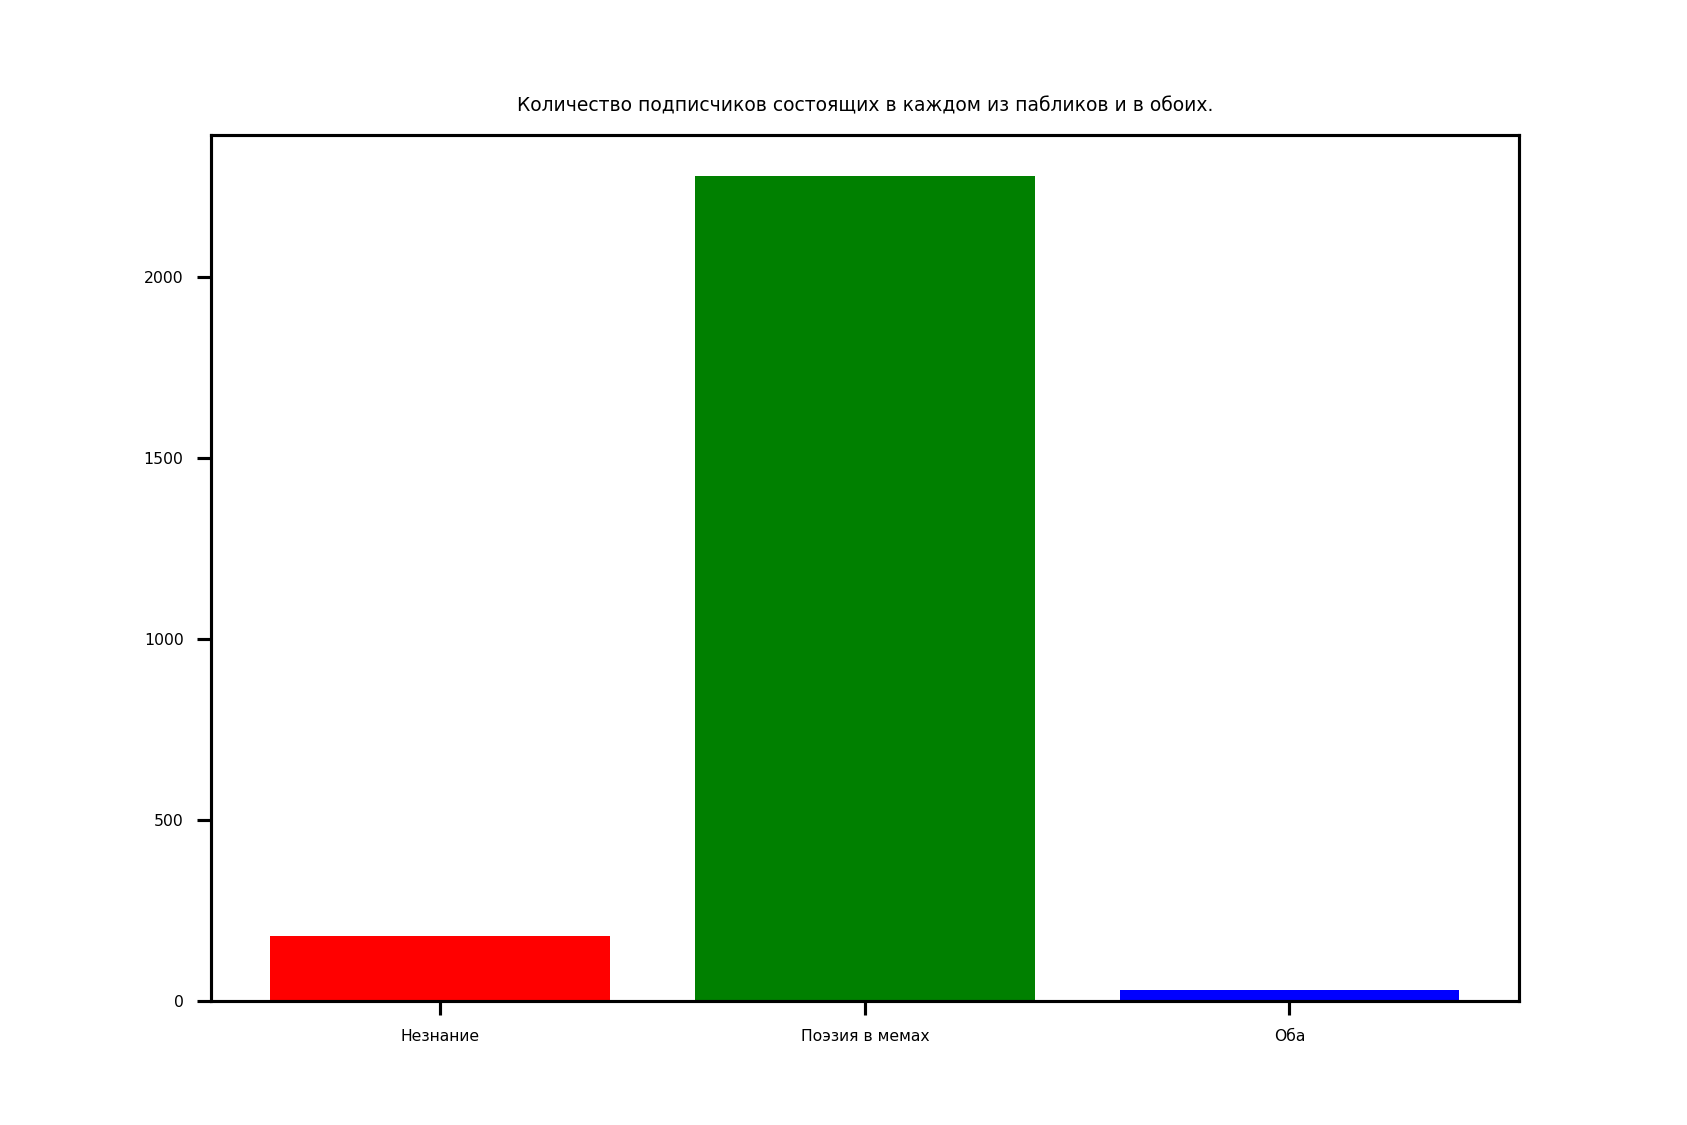

In [39]:
plt.bar(['Незнание', 'Поэзия в мемах', 'Оба'], [len(members_neznanie), len(members_mempoetry), num_members_both],
       color = ['red', 'green', 'blue'])
plt.title('Количество подписчиков состоящих в каждом из пабликов и в обоих.')
plt.savefig('members.png')
plt.show()


In [40]:
#Количество пользователей в каждом городе, где больше 10 участников
def get_cities(df):
    df.dropna(subset = ['city'], inplace = True)
    df.reset_index(drop = True, inplace = True)
    all_cities = []
    for i in range(0, len(df['city']) - 1):
        all_cities.append(df.at[i, 'city'])
    all_cities
    cities = []
    for row in all_cities:
        cities.append(row['title'])

    cities = pd.DataFrame(data = cities, columns = ['Title'])
    distribution = cities['Title'].unique()

    record = []
    for i in range(0, len(distribution)):
        subset = cities[cities['Title'] == distribution[i]]
        if len(subset) >= 10:
            record.append([distribution[i], len(subset)])

    record = pd.DataFrame(data = record, columns = ['City', '#'])
    
    return record

In [41]:
df = members_mempoetry.copy()
memes_cities = get_cities(df)

df = members_neznanie.copy()
neznanie_cities = get_cities(df)

<IPython.core.display.Javascript object>


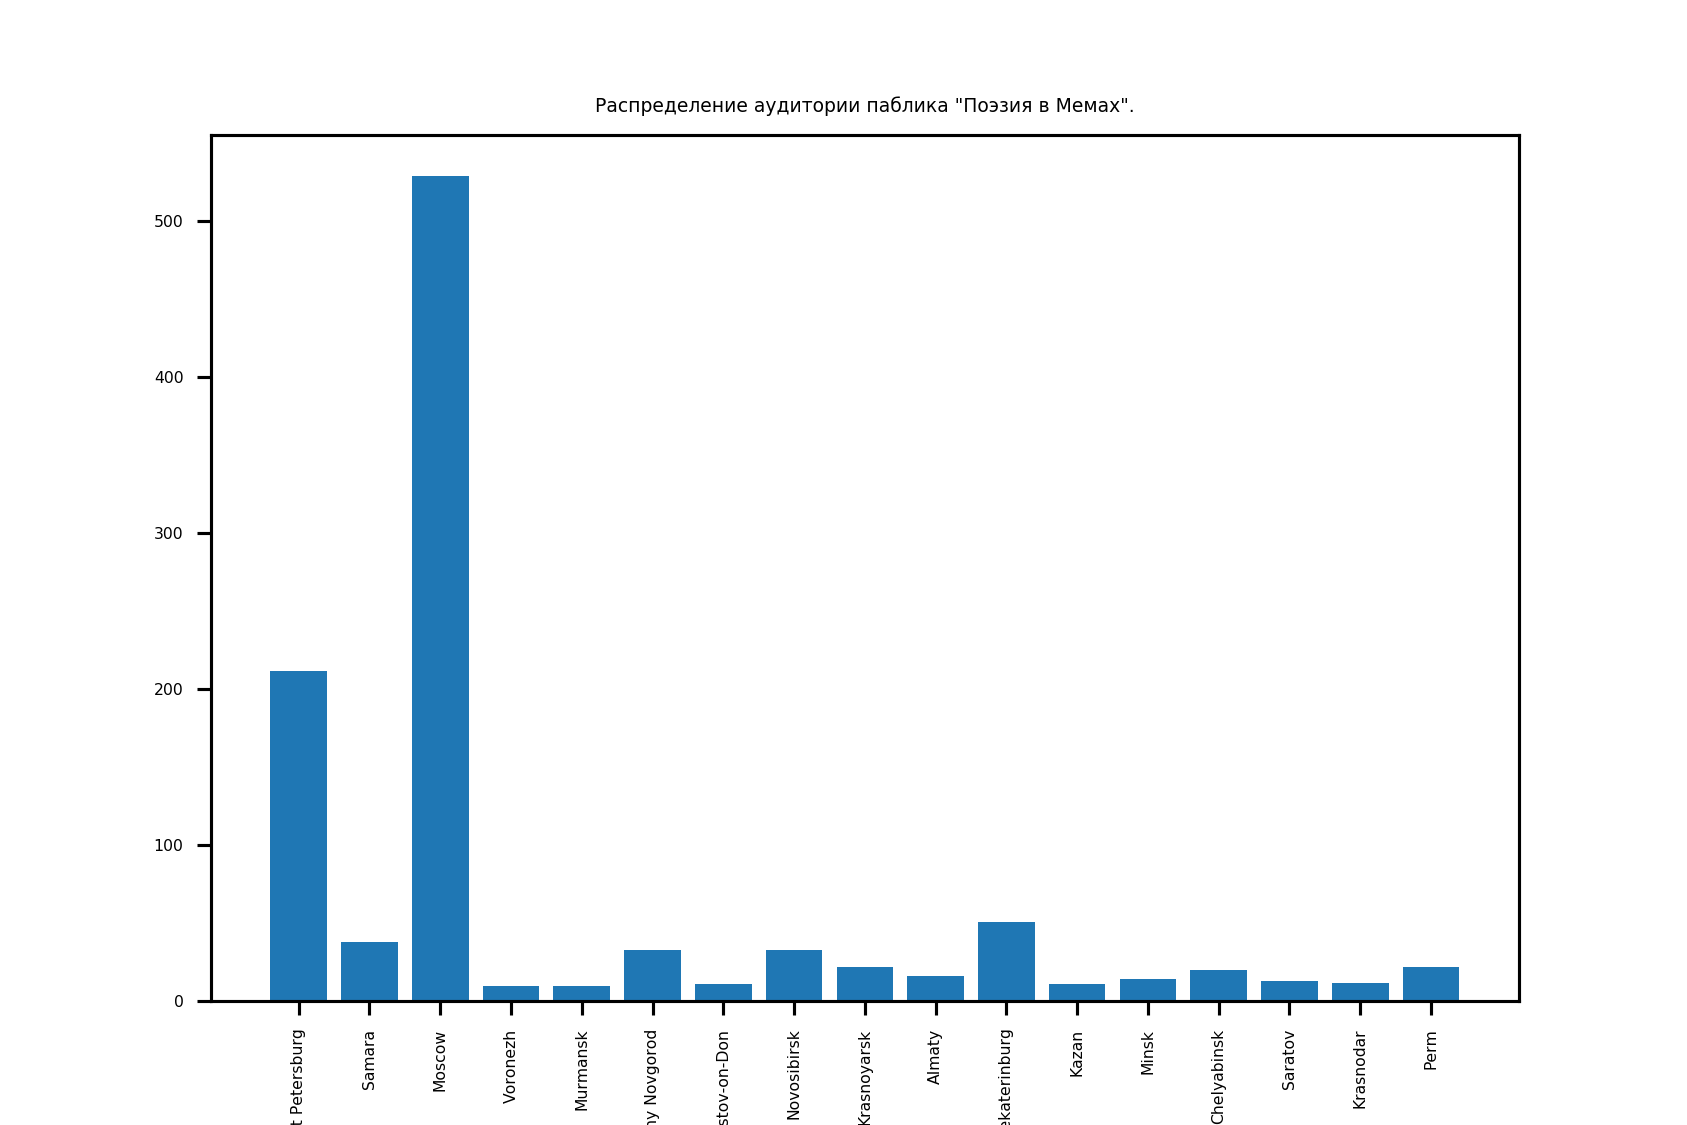

In [42]:
fig, ax = plt.subplots()
plt.bar(memes_cities['City'], memes_cities['#'])
ax.set_xticklabels(memes_cities['City'], rotation = 90)
plt.title('Распределение аудитории паблика "Поэзия в Мемах".')
plt.savefig('cities_memes.png')
plt.show()

<IPython.core.display.Javascript object>


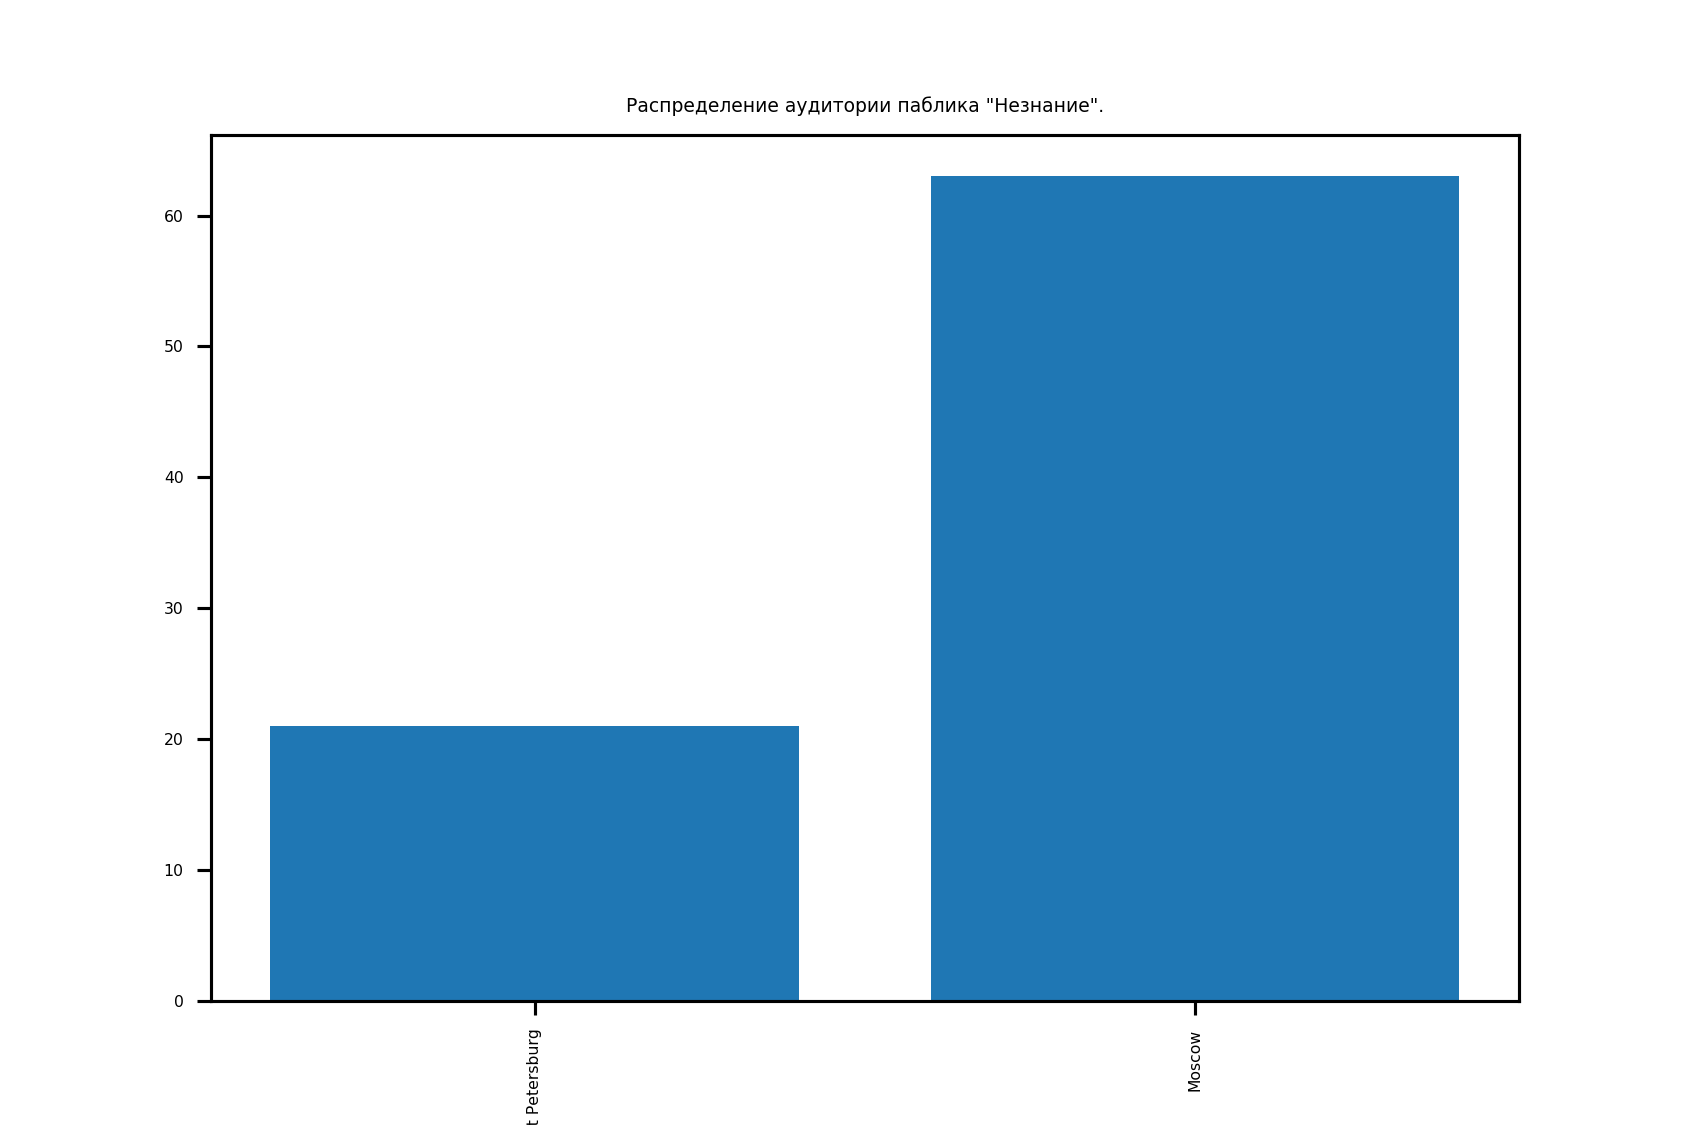

In [43]:
fig, ax = plt.subplots()
plt.bar(neznanie_cities['City'], neznanie_cities['#'])
ax.set_xticklabels(neznanie_cities['City'], rotation = 90)
plt.title('Распределение аудитории паблика "Незнание".')
plt.savefig('cities_neznanie.png')
plt.show()

In [44]:
def get_ages(df):
    birthdays = df['bdate'].astype('str').str.replace('.','/').dropna()
    birthdays = birthdays[birthdays.map(len) > 6].reset_index(drop = True)

    ages = []
    for i in range (0, len(birthdays)):
        age = pd.to_datetime(birthdays.at[i], format='%d/%m/%Y')
        ages.append(age)

    today = datetime.datetime.now()

    for i in range(0, len(ages)):
        ages[i] = dateutil.relativedelta.relativedelta(today, ages[i]).years

    return ages

In [45]:
#Распределение участников каждой из групп по диапазонам возрастов
ages_memes = pd.DataFrame(data = get_ages(members_mempoetry), columns = ['Age'])
ages_neznanie = pd.DataFrame(get_ages(members_neznanie), columns = ['Age'])
ages_both = pd.DataFrame(get_ages(both), columns = ['Age'])

def get_age_amount(df):
    bins = [1, 10, 20, 30, 40, 60]
    groups = pd.cut(df['Age'], bins)
    num_bins = []

    for unique_bin in groups.unique():
        select = groups[groups == unique_bin]
        num_bins.append(len(select))
    
    return [list(groups.unique()), num_bins]

memes_bins = pd.DataFrame(data = get_age_amount(ages_memes)).transpose()
neznanie_bins = pd.DataFrame(data = get_age_amount(ages_neznanie)).transpose()
both_bins = pd.DataFrame(data = get_age_amount(ages_both)).transpose()

memes_bins.columns = ['bin', '#']
neznanie_bins.columns = ['bin', '#']
both_bins.columns = ['bin', '#']

all_bins = memes_bins.merge(neznanie_bins, how = 'left', on = 'bin')
all_bins = all_bins.merge(both_bins, how = 'left', on = 'bin')
all_bins = all_bins.dropna(subset = ['bin'])

all_bins.columns = ['bins', 'memes', 'neznanie', 'both']
all_bins

,bins,memes,neznanie,both
0,"(40.0, 60.0]",54,2,NaN
1,"(30.0, 40.0]",147,13,3
3,"(20.0, 30.0]",380,46,5
4,"(10.0, 20.0]",257,12,3


<IPython.core.display.Javascript object>


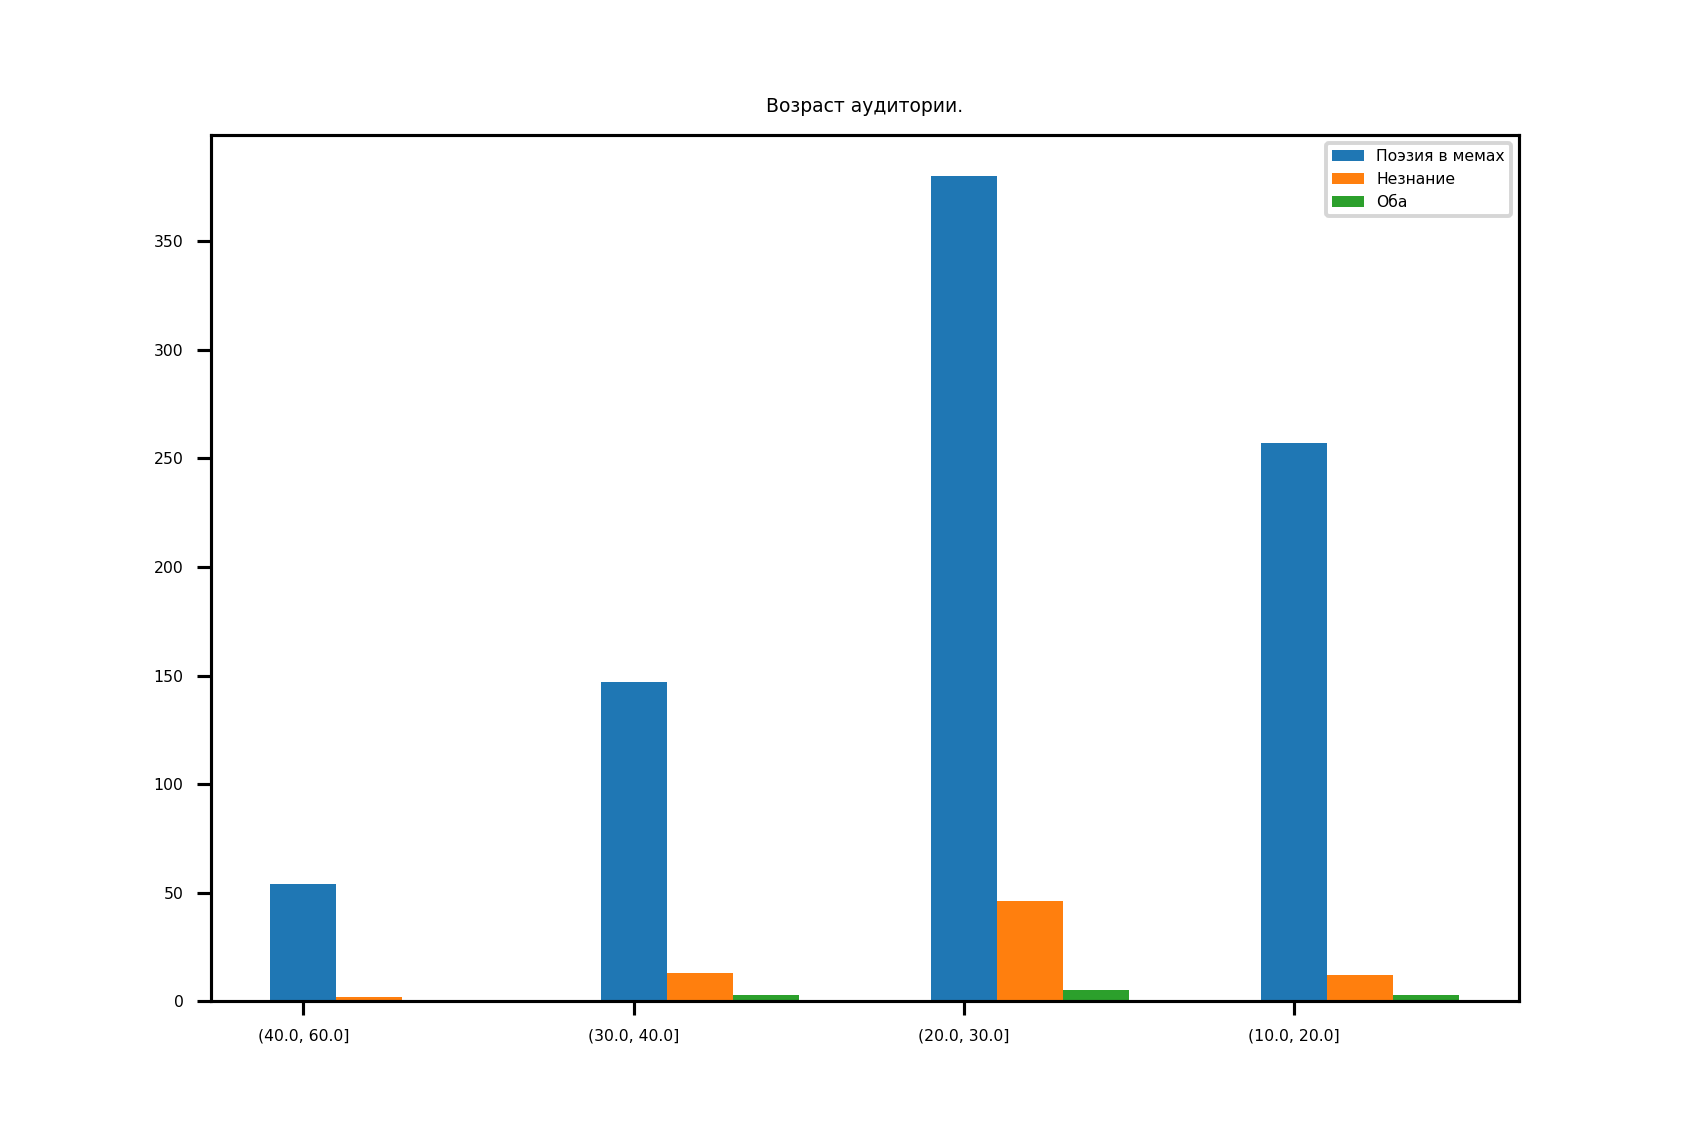

In [46]:
x = np.arange(len(all_bins))
barWidth = 0.2
fig, ax = plt.subplots()

r1 = np.arange(len(all_bins))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, all_bins['memes'], barWidth, label = 'Поэзия в мемах')
plt.bar(r2, all_bins['neznanie'], barWidth, label = 'Незнание')
plt.bar(r3, all_bins['both'], barWidth, label = 'Оба')

plt.xticks(r1)
ax.set_xticklabels(all_bins['bins'])
ax.legend()
plt.title('Возраст аудитории.')
plt.savefig('ages.png')
plt.show()

<IPython.core.display.Javascript object>


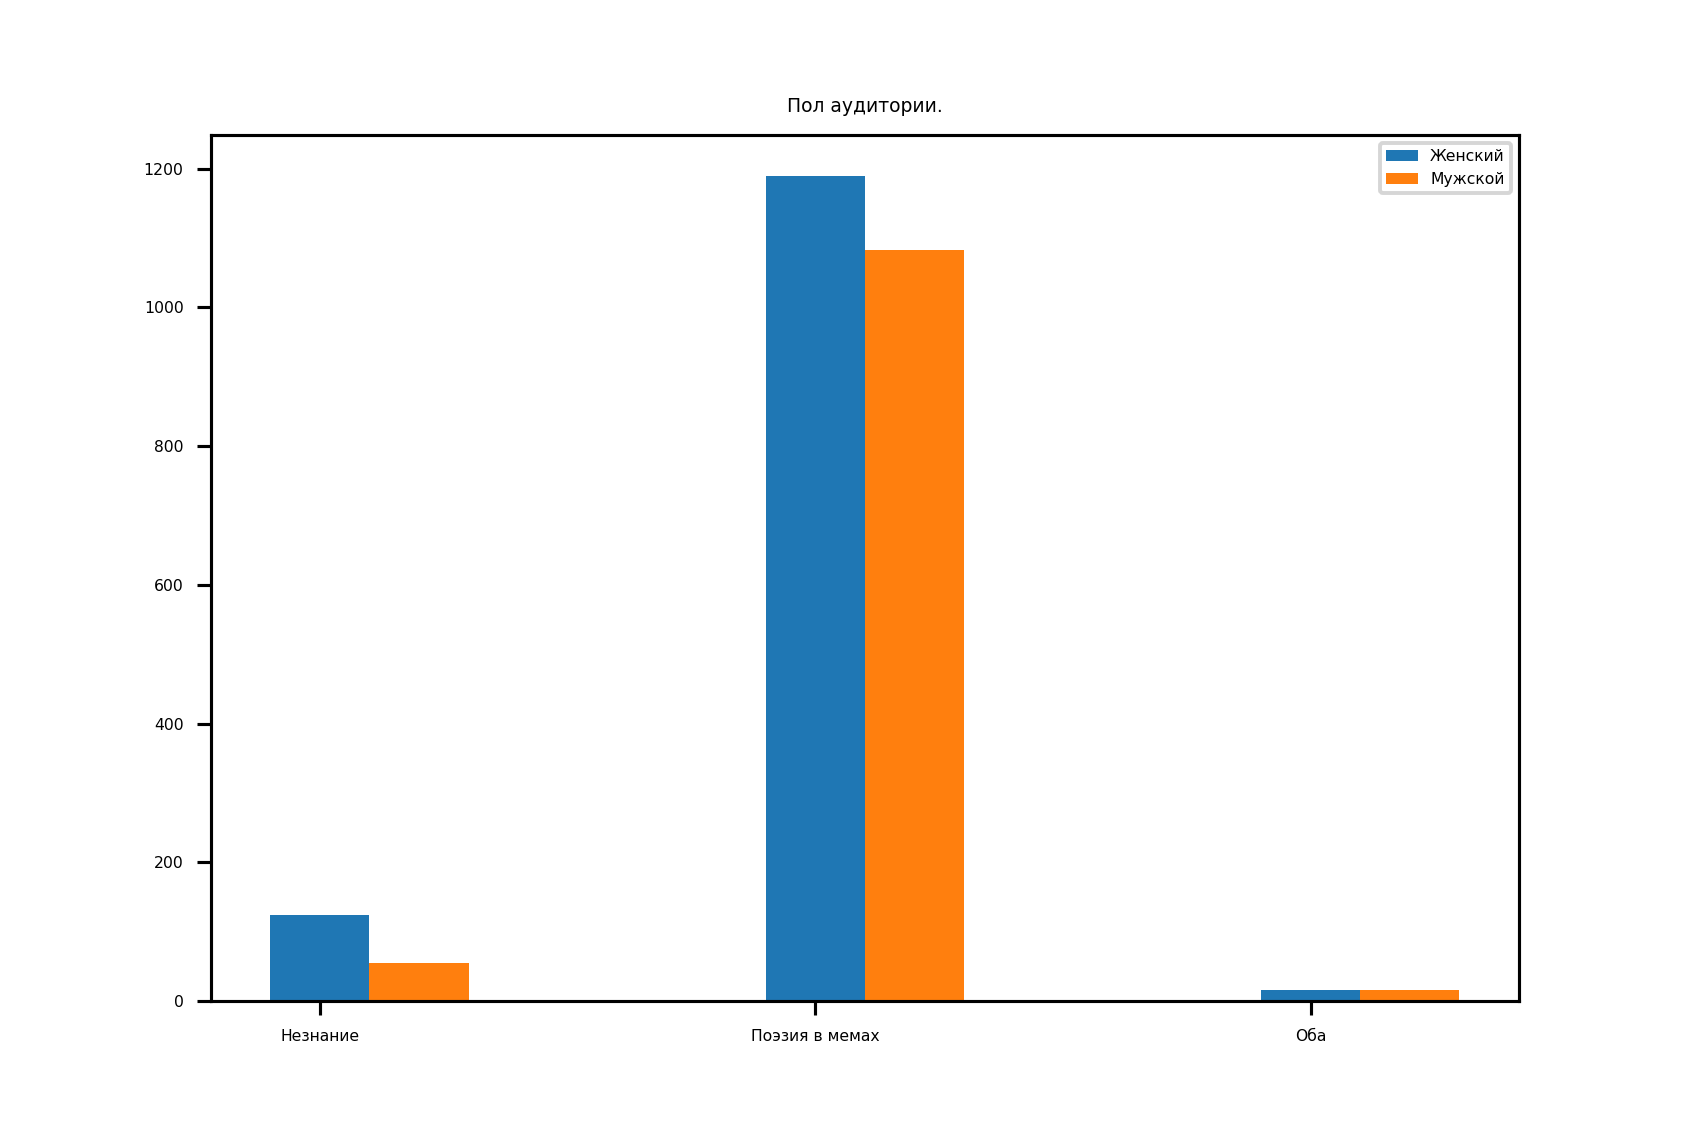

In [47]:
x = np.arange(3) 
barWidth = 0.2
fig, ax = plt.subplots()

women = [len(members_neznanie[members_neznanie['sex'] == 1]),
         len(members_mempoetry[members_mempoetry['sex'] == 1]),
         len(both[both['sex'] == 1])]

men = [len(members_neznanie[members_neznanie['sex'] == 2]),
         len(members_mempoetry[members_mempoetry['sex'] == 2]),
         len(both[both['sex'] == 2])]

r1 = np.arange(3)
r2 = [x + barWidth for x in r1]

plt.bar(r1, women, barWidth, label = 'Женский')
plt.bar(r2, men, barWidth, label = 'Мужской')

plt.xticks(r1)
ax.set_xticklabels(['Незнание', 'Поэзия в мемах', 'Оба'])
ax.legend()
plt.title('Пол аудитории.')
plt.savefig('sex.png')
plt.show()